# Capstone 2 Exploratory Data Analysis File

The purpose is to import the processed data from the wrangling notebook and create histograms to look for insights

**Student Academic Performance Data**
- ACT & SAT: scores.csv

**Student Operational Data**
- Attendance: attendance.csv
- Enrollment: enrollment.csv


## Imports

In [2]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

## Load the data

In [3]:
scores = pd.read_csv('scores.csv')
att = pd.read_csv('attendance.csv')
enroll = pd.read_csv('enrollment.csv')

## Visualize the scores data

In [4]:
scores.head()

,LONG_SCHOOL_YEAR,SCHOOL_DISTRCT_CD,SCHOOL_DSTRCT_NM,INSTN_NUMBER,INSTN_NAME,SUBGRP_DESC_sat,TEST_CMPNT_TYP_CD_sat,NATIONAL_NUM_TESTED_CNT_sat,STATE_NUM_TESTED_CNT_sat,DSTRCT_NUM_TESTED_CNT_sat,...,SUBGRP_DESC_act,TEST_CMPNT_TYP_CD_act,NATIONAL_NUM_TESTED_CNT_act,STATE_NUM_TESTED_CNT_act,DSTRCT_NUM_TESTED_CNT_act,INSTN_NUM_TESTED_CNT_act,NATIONAL_AVG_SCORE_VAL,STATE_AVG_SCORE_VAL_act,DSTRCT_AVG_SCORE_VAL_act,INSTN_AVG_SCORE_VAL_act
0,2019-20,601,Appling County,103,Appling County High School,All Students,Combined Test Score,2198460.0,43074.0,62.0,...,All Students,Composite,1670497.0,26810.0,16,16,20.6,20.8,19.0,19.0
1,2019-20,605,Baldwin County,189,Baldwin High School,All Students,Combined Test Score,2198460.0,43074.0,83.0,...,All Students,Composite,1670497.0,26810.0,41,41,20.6,20.8,15.6,15.6
2,2019-20,606,Banks County,199,Banks County High School,All Students,Combined Test Score,2198460.0,43074.0,68.0,...,All Students,Composite,1670497.0,26810.0,28,28,20.6,20.8,20.1,20.1
3,2019-20,607,Barrow County,101,Apalachee High School,All Students,Combined Test Score,2198460.0,43074.0,362.0,...,All Students,Composite,1670497.0,26810.0,181,99,20.6,20.8,19.3,18.8
4,2019-20,607,Barrow County,3052,Winder-Barrow High School,All Students,Combined Test Score,2198460.0,43074.0,362.0,...,All Students,Composite,1670497.0,26810.0,181,82,20.6,20.8,19.3,19.9


In [5]:
scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   LONG_SCHOOL_YEAR             352 non-null    object 
 1   SCHOOL_DISTRCT_CD            352 non-null    int64  
 2   SCHOOL_DSTRCT_NM             352 non-null    object 
 3   INSTN_NUMBER                 352 non-null    int64  
 4   INSTN_NAME                   352 non-null    object 
 5   SUBGRP_DESC_sat              352 non-null    object 
 6   TEST_CMPNT_TYP_CD_sat        352 non-null    object 
 7   NATIONAL_NUM_TESTED_CNT_sat  352 non-null    float64
 8   STATE_NUM_TESTED_CNT_sat     352 non-null    float64
 9   DSTRCT_NUM_TESTED_CNT_sat    352 non-null    float64
 10  INSTN_NUM_TESTED_CNT_sat     352 non-null    float64
 11  STATE_AVG_SCORE_VAL_sat      352 non-null    float64
 12  DSTRCT_AVG_SCORE_VAL_sat     352 non-null    int64  
 13  INSTN_AVG_SCORE_VAL_

### Visualize the ACT composite score at the school-level

array([[<AxesSubplot:title={'center':'INSTN_AVG_SCORE_VAL_sat'}>]],
      dtype=object)

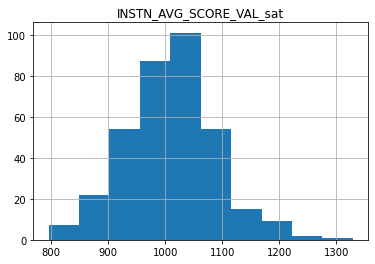

In [6]:
scores.hist(column='INSTN_AVG_SCORE_VAL_sat')